## 1) 폰트 인스톨 
### 이미 한글폰트 설치를 마쳤다면 해당 절차 불필요

In [1]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib.pyplot as plt
from math import pi
import pandas as pd 
import numpy as np 


## 상기 코드를 활용하여 우리껄로 그려보자 

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 366
nanum_font number: 8


In [2]:
#설치된 나눔폰트 전체 경로 한번 프린트 해보자
nanum_font

['C:\\Windows\\Fonts\\NanumSquareEB.ttf',
 'C:\\Windows\\Fonts\\NanumSquareR.ttf',
 'C:\\Users\\student\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare_acL.ttf',
 'C:\\Users\\student\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare_acR.ttf',
 'C:\\Users\\student\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf',
 'C:\\Windows\\Fonts\\NanumSquareL.ttf',
 'C:\\Users\\student\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare_0.ttf',
 'C:\\Windows\\Fonts\\NanumSquareB.ttf']

In [3]:
# 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
path = 'C:\\Users\\student\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare_acL.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumSquare_ac


## 2) 데이터 불러오기
### 소스 데이터 프레임 로드(첨부파일참고)
### 경로는 설치 후 편의대로 설정할 것  

In [4]:


# 소스 데이터를 불러오자 
source_df =  pd.read_csv('./data/merged_parameters.csv',
                   encoding='utf-8',
                   index_col=0)
display(source_df)

,이름,회의,회의_평균,의안,의안_평균,소통일치도,소통일치도_평균,공약이행도,공약이행도_평균,긍부정비율,긍부정비율_평균
0,강병원,62.0,30.428571,24,22,23,22,77.083333,62.33576,89.010989,73.753731
1,고용진,22.0,30.428571,26,22,14,22,60.714286,62.33576,84.000000,73.753731
2,금태섭,38.0,30.428571,19,22,27,22,47.727273,62.33576,81.465517,73.753731
3,기동민,67.0,30.428571,28,22,41,22,61.111111,62.33576,79.055118,73.753731
4,김병기,7.0,30.428571,38,22,38,22,86.363636,62.33576,70.727273,73.753731
5,김선동,16.0,30.428571,9,22,11,22,0.000000,62.33576,92.748092,73.753731
6,김성식,23.0,30.428571,6,22,5,22,76.470588,62.33576,85.472155,73.753731
7,김성태,38.0,30.428571,6,22,8,22,51.470588,62.33576,76.988464,73.753731
8,김성환,7.0,30.428571,11,22,5,22,68.421053,62.33576,77.238240,73.753731
9,김영주,8.0,30.428571,12,22,6,22,0.000000,62.33576,62.997658,73.753731


## 3) 그래프 그리기
### 방사형 그래프 도시 후 의원별로 저장하기 
### output 폴더 경로 지정 필요 


In [5]:
# 저장 경로 변수 설정 
save_path = './data/output/'
save_extention='.png'

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: Future

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a 

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: Future

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: Future

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: Future

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: Future

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: Future

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a fut

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: Future

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: Future

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: Future

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: Future

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_

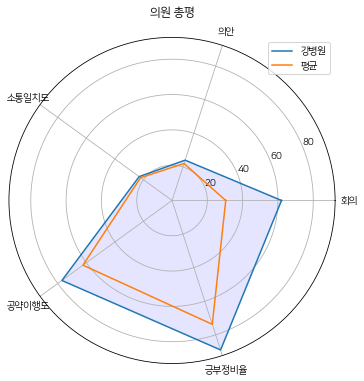

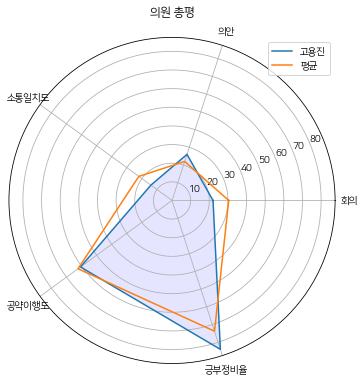

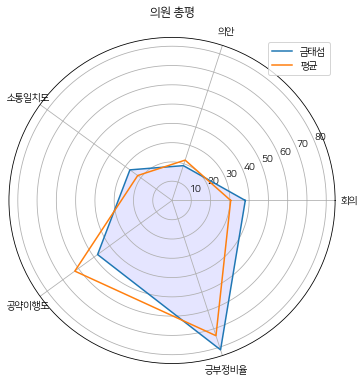

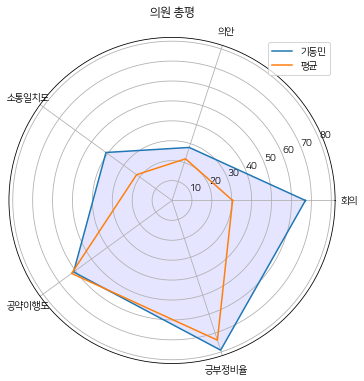

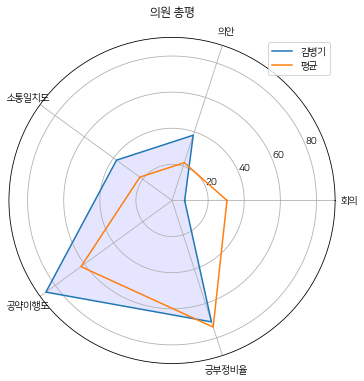

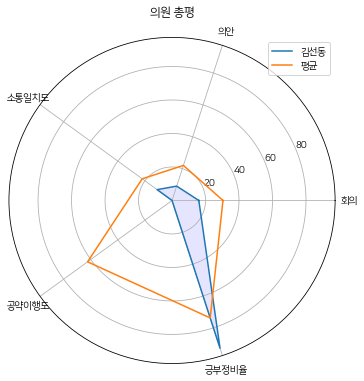

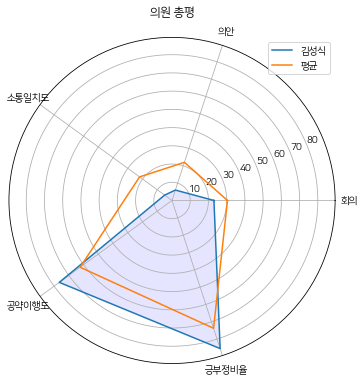

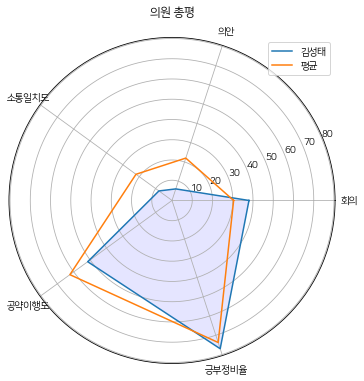

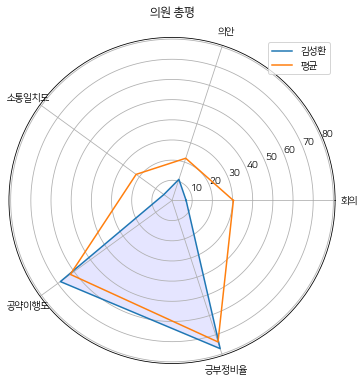

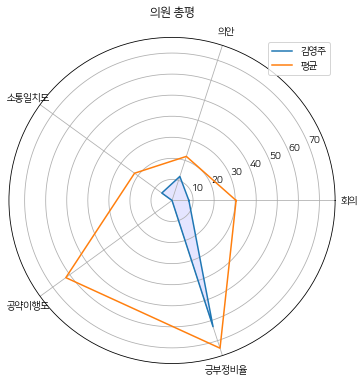

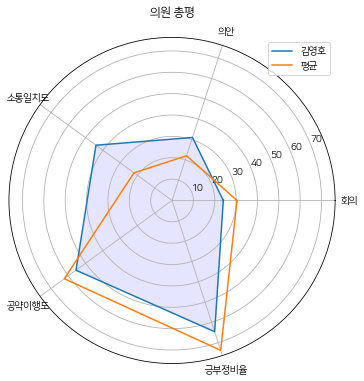

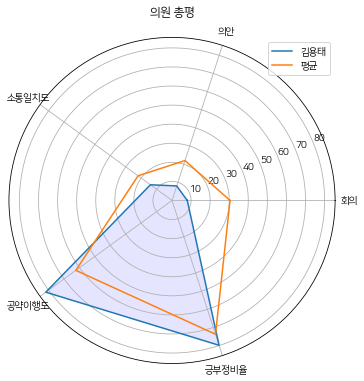

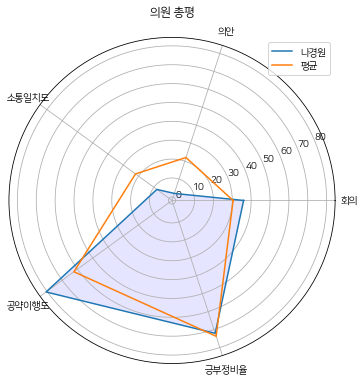

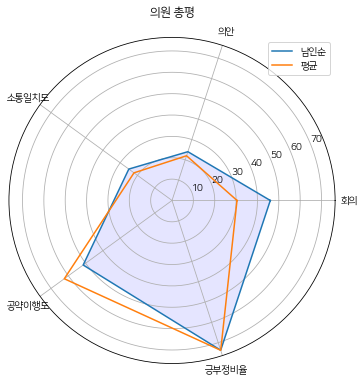

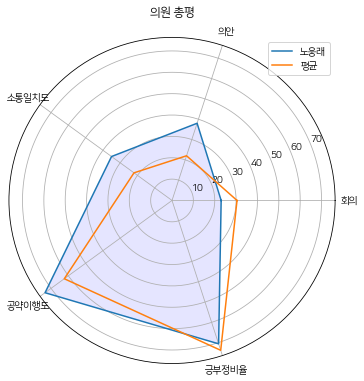

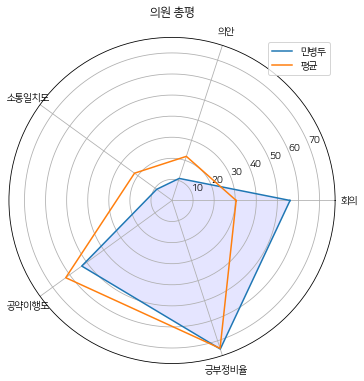

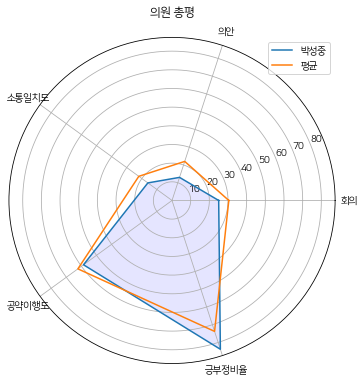

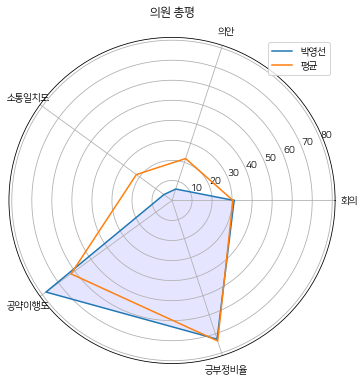

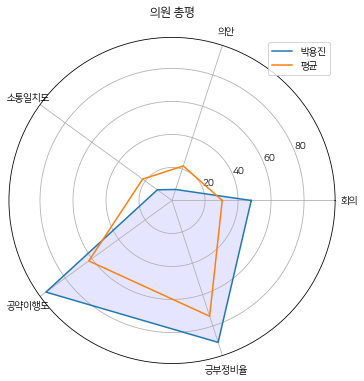

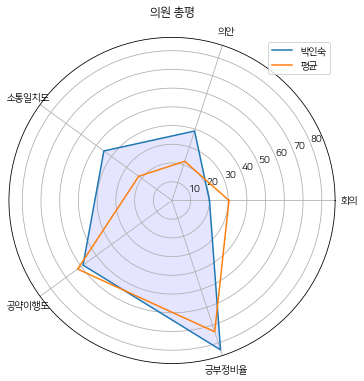

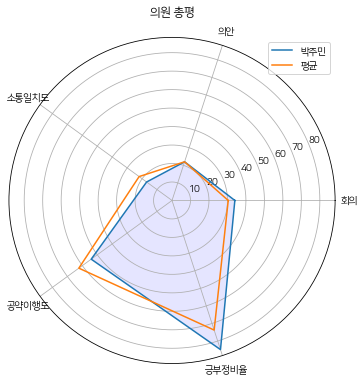

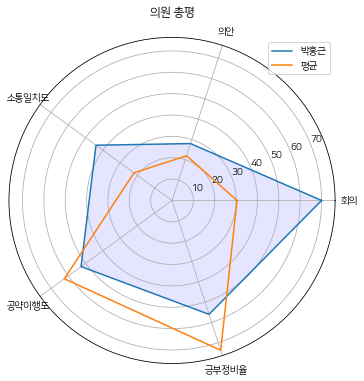

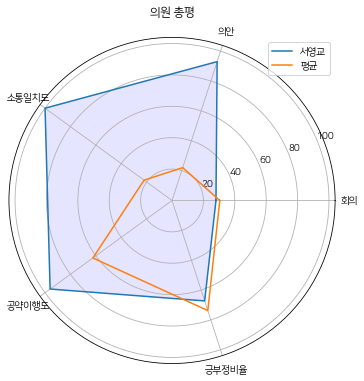

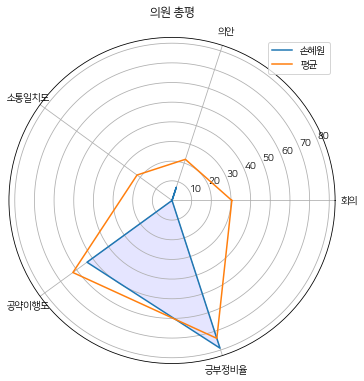

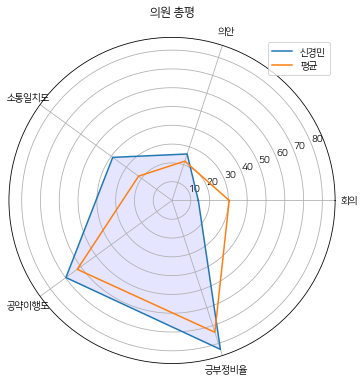

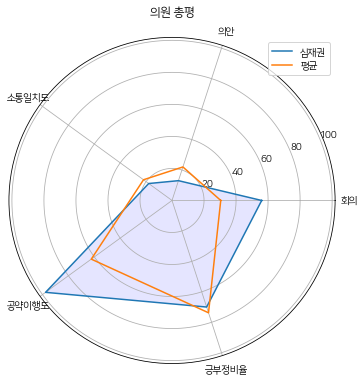

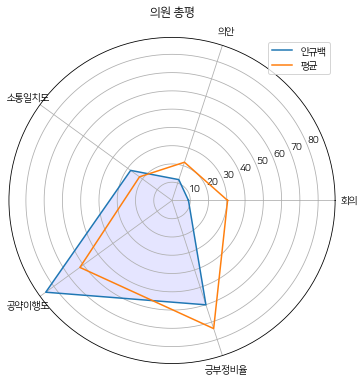

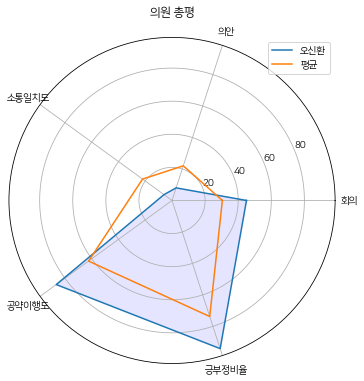

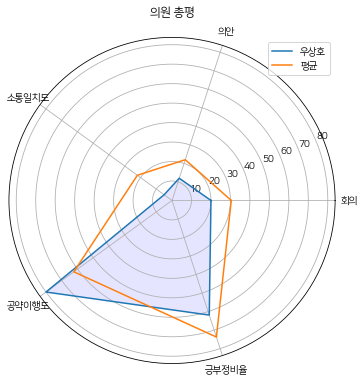

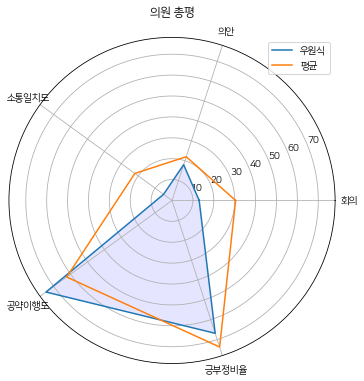

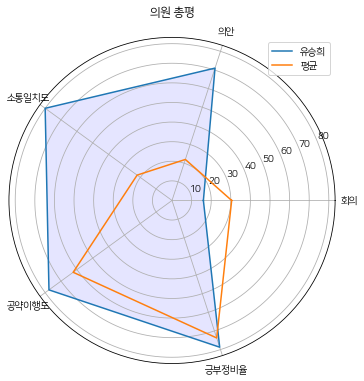

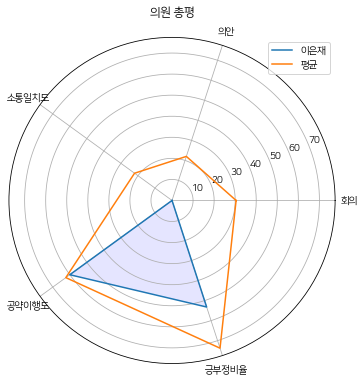

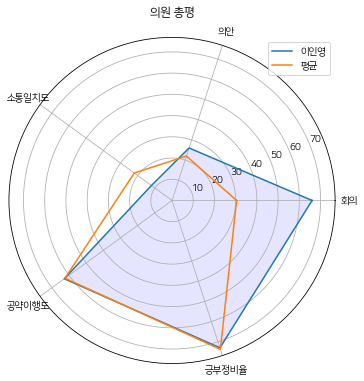

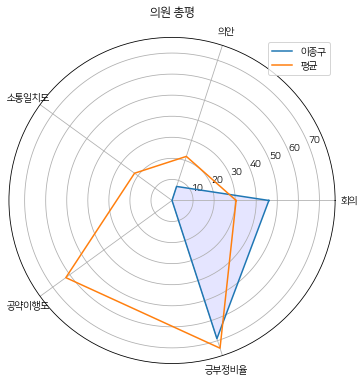

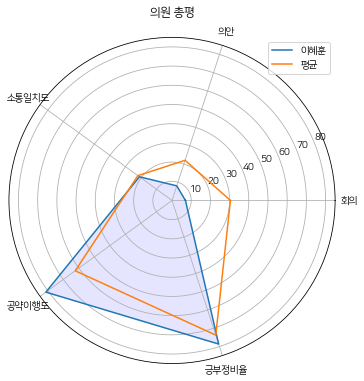

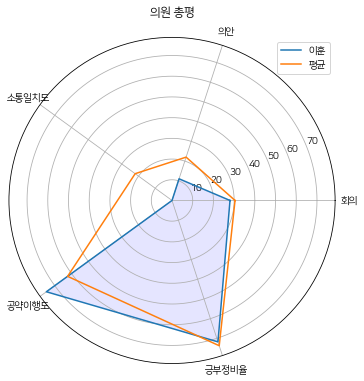

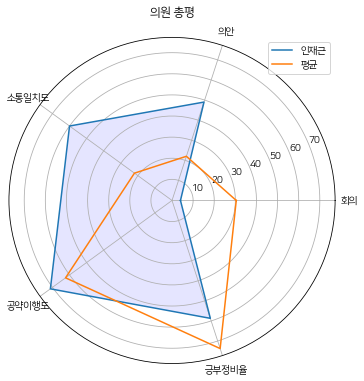

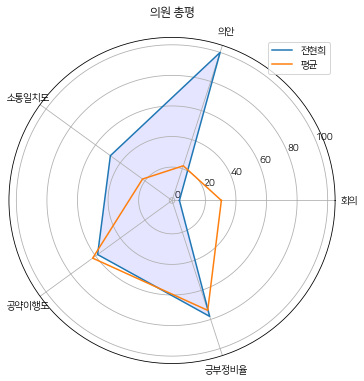

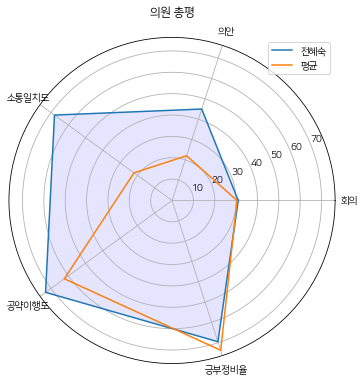

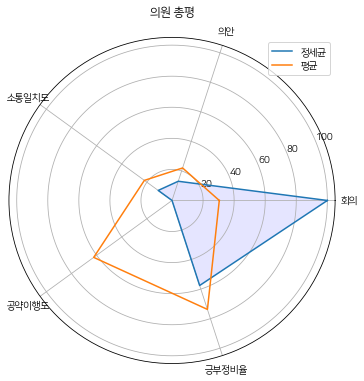

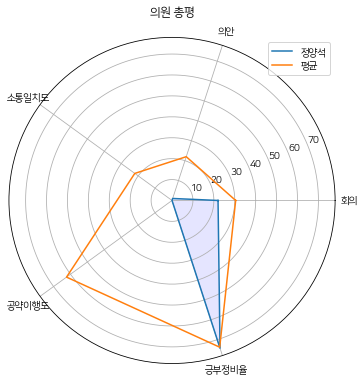

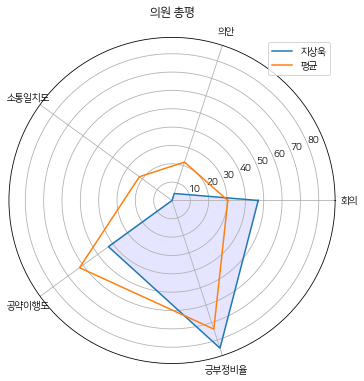

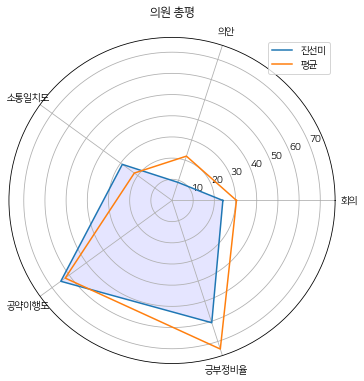

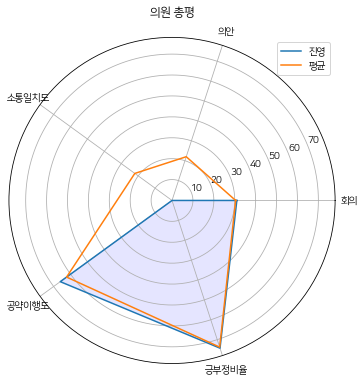

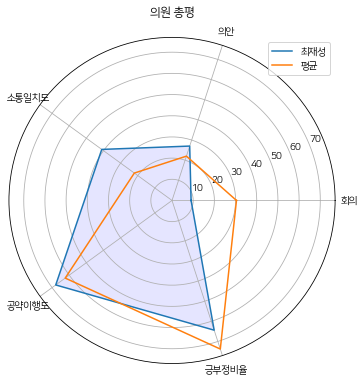

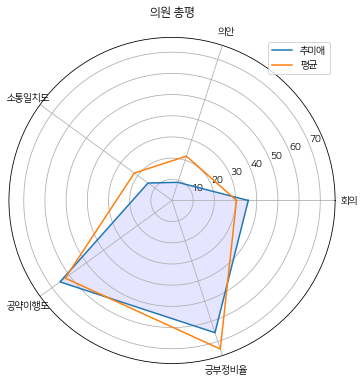

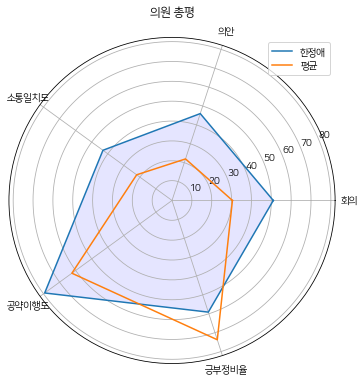

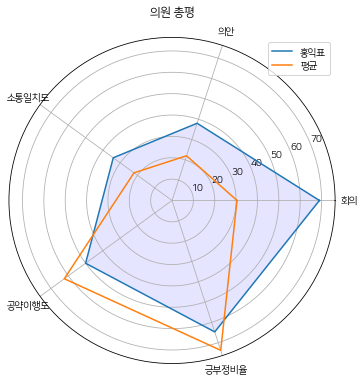

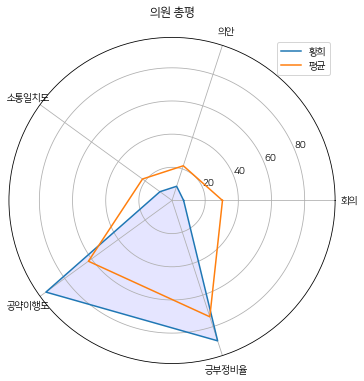

In [6]:

for n in range(49):
    import numpy as np
    import pandas as pd 

    parameters = ["회의", "의안", "소통일치도", "공약이행도","긍부정비율"] #여기에 의원데이터 각 지표명
    actual = [(source_df.get_value(n,"회의")), (source_df.get_value(n,"의안")), 
              (source_df.get_value(n,"소통일치도")), (source_df.get_value(n,"공약이행도")),
              (source_df.get_value(n,"긍부정비율")), (source_df.get_value(n,"회의"))] #여기에 의원데이터 내용
                                                                                      #value 수미상관해주어야 그림이 이어진다.
    
    average = [(source_df.get_value(n,"회의_평균")), 
               (source_df.get_value(n,"의안_평균")),
               (source_df.get_value(n,"소통일치도_평균")),
               (source_df.get_value(n,"공약이행도_평균")),
               (source_df.get_value(n,"긍부정비율_평균")),
               (source_df.get_value(n,"회의_평균"))] 
              #여기에 평균지표 
        
    # 도표 초기화 
    
    #plt.figure(figsize=(10, 6))
    fig=plt.figure(figsize=(10,6)) 
  
    plt.subplot(polar=True)
     
    theta = np.linspace(0, 2 * np.pi, len(actual))
     
    # 그리드에 슛자 명시 
    lines, labels = plt.thetagrids(range(0, 360, int(360/len(parameters))), (parameters))
     
    # 의원들 본인 스텟
    plt.plot(theta, actual)
    plt.fill(theta, actual, 'b', alpha=0.1)
     
    # 의원들 평균 스텟
    plt.plot(theta, average)
     
    # 주석달기 
    plt.legend(labels=(source_df.get_value(n,"이름"), '평균'), loc=1)
    plt.title("의원 총평")
     
    # 그리기
    #plt.show()
    
    #저장하기 
    savedir = save_path + source_df.get_value(n,"이름") + save_extention
    fig.savefig(savedir)
    